<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random forest with classification model

In this notebook, I re-predict ad clicking behavior with random forest classifier, and I try out another example from [DataCamp](https://www.datacamp.com/community/tutorials/random-forests-classifier-python). 

## **Re-predict ad clicking behavior**

## 1. Import libraries and dataset

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df_class = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [79]:
df_class.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 2. Missing values and EDA

Skip. It has been done within `Logistic_regression_predict_ad_click.ipynb`.

## 3. Data wrangling

remove all non-numeric variable.

In [80]:
df_class.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1,inplace=True)

Standardization

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_class.drop('Clicked on Ad', axis=1)) # standardize the dataset without the label. DO NOT standardize label
scaled_features = scaler.transform(df_class.drop('Clicked on Ad',axis=1)) # column names were removed after standardize
scaled_features
df_feat = pd.DataFrame(scaled_features, columns=df_class.columns[:-1]) # add back column names
df_feat.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


## 4. Build random forest mdoel

In [82]:
# split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_feat, df_class['Clicked on Ad'], test_size=0.30, random_state=101)

In [84]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


## 5. Evaluate model

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[152   5]
 [  8 135]]


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       157
           1       0.96      0.94      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Compare to the scores we get with logistic regression, we do not have higher scores when using a decision tree model. Therefore, a logistic model is a better choice for an advertising dataset

## **Random forest classifier example from DataCamp**

## The idea behind the algorithm

Four steps:
1. Select random samples from a given dataset
2. Construct a decision tree for each sample and get a prediction result from each decision. (This part is just like making a decision tree model and predict. For decision trees mdoel, we only do this step.)
3. Perform a vote for each predicted result.
4. Select the predition result with the most votes as the final prediction

## Advantages and disadvantages

* **Highly accurate and robust** method because of the number of decision trees participating in the process. 
* **Does not suffer from overfitting** since it takes the average of all predictions, which cancels out the biases.
* **Can obtain relative feature importance**, which helps in selecting the most contributing features for the classifier.

* **Time consuming** since it has multiple decision trees.
* **Difficult to interpret** compare to a decision tree since random selections are involved. 



### 1. Import data 

In [113]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [114]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [115]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [116]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Build model and predict

In [117]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(data.drop('species',axis=1), data['species'], test_size=0.3,random_state=101) # 70% training and 30% test


In [118]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=101)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [119]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


We can also make a prediciton for a single item, for example:

* sepal length = 2
* sepal width = 4
* petal length = 3
* petal width = 3

In [120]:
clf.predict([[2, 4, 3, 3]])

array([2])

1 indicates the flower type Versicolor

# Find the imprtant features and visualize it

In [121]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.433776
petal length (cm)    0.430292
sepal length (cm)    0.098788
sepal width (cm)     0.037144
dtype: float64

No handles with labels found to put in legend.


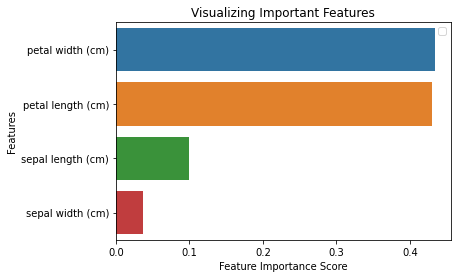

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Modify the model base on feature importance

Since `sepal width` has very low importance, let's remove it. 

In [123]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['species','sepal_width'],axis=1), data['species'], test_size=0.3,random_state=101) # 70% training and 30% test

In [124]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=101)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [125]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



After removing the least important features (sepal length), the accuracy increased from 0.956 to 0.978. This is because you removed misleading data and noise, resulting in an increased accuracy. A lesser amount of features also reduces the training time.